In [566]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Offroad 1~8

In [5]:
def read_raw_points(path):
    lines = []
    with open(path, 'r') as f:
        while True:
            line = f.readline()
            if not line: break
            temp = line.split()
            temp = [float(i[2:]) for i in temp[1:4]]
            lines.append(temp)
    return lines

def write_points(path, middle, side1, side2):
    with open(path,'w', newline='') as f:
        wr = csv.writer(f)
        wr.writerow(["middle.x", "middle.y", "middle.z",
                     "side1.x", "side1.y", "side1.z",
                     "side2.x", "side2.y", "side2.z"])
        for i in range(len(middle)):
            data = middle[i] + side1[i] + side2[i]
            wr.writerow(data)

In [21]:
path = "./waypoints/OffRoad_8_waypoint"

lines = read_raw_points(path+".txt")

middle = [lines[i] for i in range(0, len(lines), 3)]
side1 = [lines[i] for i in range(1, len(lines), 3)]
side2 = [lines[i] for i in range(2, len(lines), 3)]

assert len(middle)==len(side1) and len(side1)==len(side2)

write_points(path+".csv", middle, side1, side2)

# Offroad 5~8

In [567]:
import numpy as np
from waypoints import Animator, Waypoints, get_dist_bet_point
import time
%matplotlib inline

In [780]:
offroad_name = "Offroad_7"
inter_points_raw = read_raw_points("./"+offroad_name+"_Inter.txt")

In [781]:
inter_points = []
inter_points_ids = []

count = 0
group_id = 0

for i in inter_points_raw:
    if i==[]:
        group_id += 1
        continue
    
    inter_points.append(i)
    inter_points_ids.append(group_id)

In [782]:
lines = read_raw_points("./"+offroad_name+"_waypoint.txt")

middle = [lines[i] for i in range(0, len(lines), 3)]
side1 = [lines[i] for i in range(1, len(lines), 3)]
side2 = [lines[i] for i in range(2, len(lines), 3)]

assert len(middle)==len(side1) and len(side1)==len(side2)

### print raw data

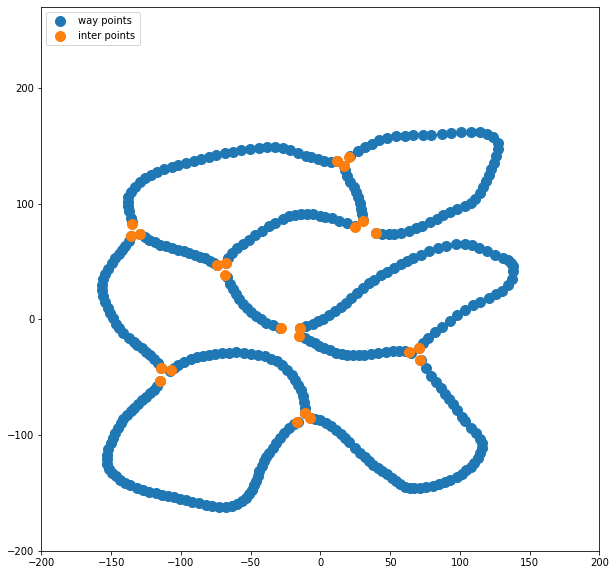

In [783]:
am = Animator(lims=(-200, 200))
dictt = {
    'way points': [np.asarray(middle)[:, :2]/100, 10],
    'inter points': [np.asarray(inter_points)[:, :2]/100, 10]
    
}
am.plot_points(dictt)
am.update()

### set inter point id

In [784]:
inter_id = [-1 for _ in range(len(middle))]

for inter_pt, idx in zip(inter_points, inter_points_ids):
    dist = [(get_dist_bet_point(inter_pt, middle[i]), i) for i in range(len(middle))]
    dist.sort(key=lambda x:x[0])
    
    if dist[0][0]/100 > 8:
        print("skip point", dist[0][1])
        continue
    else:
        inter_id[dist[0][1]] = idx

### error fixing

In [785]:
errors_idx = []

for i in range(len(middle)):   
    if i==len(middle)-2:
        break
    
    if inter_id[i]!=-1 and inter_id[i-1]==-1 and inter_id[i+1]==-1:
        for j in range(10):
            idx = j+2+i
            if inter_id[idx]!=-1:

                if len(errors_idx) > 0:
                    if errors_idx[-1][1] == i:
                        break
                errors_idx.append((i, idx))
                break

In [786]:
print("errors")
print(errors_idx)

errors
[]


In [787]:
for front, rear in errors_idx:
    chid1, chid2 = front+1, rear
    
    temp = inter_id[chid1]
    inter_id[chid1] = inter_id[chid2]
    inter_id[chid2] = temp

### set group id

In [797]:
if offroad_name == "Offroad_8":
    from collections import deque
    inter_id_new = deque(inter_id)
    middle_new = deque(middle)
    
    while not (inter_id_new[0]!=-1 and inter_id_new[1]==-1):
        inter_id_new.rotate(1)
        middle_new.rotate(1)
    
    inter_id = list(inter_id_new)
    middle = list(middle_new)

In [798]:
append = False
groups = []
temp = []

for i in range(len(middle)):
    if inter_id[i]!=-1:
        append = not append
        if append==False:
            temp.append(i)
            groups.append(temp)
            temp = []
            continue
    
    if append:
        temp.append(i)

In [799]:
group_id = [-1 for _ in range(len(middle))]
for gid, group in enumerate(groups):
    for i in group:
        group_id[i] = gid

In [800]:
assert -1 not in group_id, "invalid inter ids"

In [801]:
assert len(group_id)==len(middle)
assert len(inter_id)==len(middle)

In [802]:
for i in range(len(middle)):
    if len(middle)-1 == i:
        print("{:<3} {:>2} {:>2}  {:.1f}".format(i, group_id[i], inter_id[i], get_dist_bet_point(middle[i], middle[0])/100, middle[i]))
        break
    print("{:<3} {:>2} {:>2}  {:.1f}".format(i, group_id[i], inter_id[i], get_dist_bet_point(middle[i], middle[i+1])/100, middle[i]))

0    0  7  3.4
1    0 -1  3.7
2    0 -1  4.5
3    0 -1  4.5
4    0 -1  4.8
5    0 -1  5.3
6    0 -1  4.5
7    0 -1  4.5
8    0 -1  6.8
9    0 -1  5.4
10   0 -1  5.1
11   0 -1  4.2
12   0 -1  4.5
13   0 -1  4.4
14   0 -1  3.8
15   0 -1  4.9
16   0 -1  4.3
17   0 -1  4.2
18   0 -1  4.2
19   0 -1  3.7
20   0 -1  4.0
21   0 -1  3.2
22   0 -1  3.9
23   0 -1  4.6
24   0 -1  4.8
25   0 -1  4.9
26   0 -1  4.5
27   0 -1  4.4
28   0 -1  5.4
29   0 -1  4.6
30   0 -1  4.3
31   0 -1  4.4
32   0 -1  4.3
33   0 -1  4.6
34   0 -1  4.7
35   0 -1  4.4
36   0 -1  4.4
37   0 -1  4.1
38   0 -1  5.9
39   0 -1  5.2
40   0 -1  7.5
41   0 -1  4.5
42   0 -1  6.4
43   0 -1  5.7
44   0 -1  5.4
45   0 -1  5.7
46   0 -1  5.4
47   0 -1  6.7
48   0 -1  5.9
49   0 -1  7.6
50   0 -1  7.9
51   0  0  10.5
52   1  0  5.2
53   1 -1  5.9
54   1 -1  6.9
55   1 -1  7.3
56   1 -1  7.4
57   1 -1  6.9
58   1 -1  7.4
59   1 -1  6.7
60   1 -1  6.5
61   1 -1  6.6
62   1 -1  6.0
63   1 -1  5.2
64   1 -1  6.6
65   1 -1  6.4
66   1 -1

### visualize

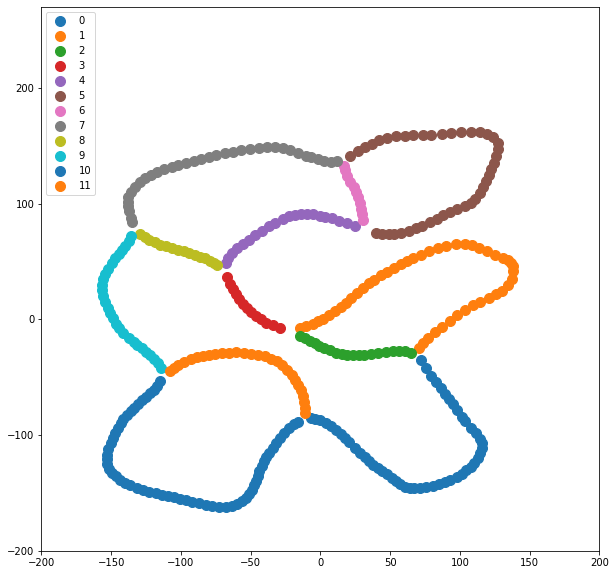

In [803]:
count = 0

dictt = {}
temp = []

for idd in set(group_id):
    temp = []
    for i in range(len(middle)):
        if idd==group_id[i]:
            temp.append(middle[i])
    dictt[str(idd)] = [np.asarray(temp)[:, :2]/100, 10]

    am = Animator(lims=(-200, 200))
    am.plot_points(dictt)
    am.update()

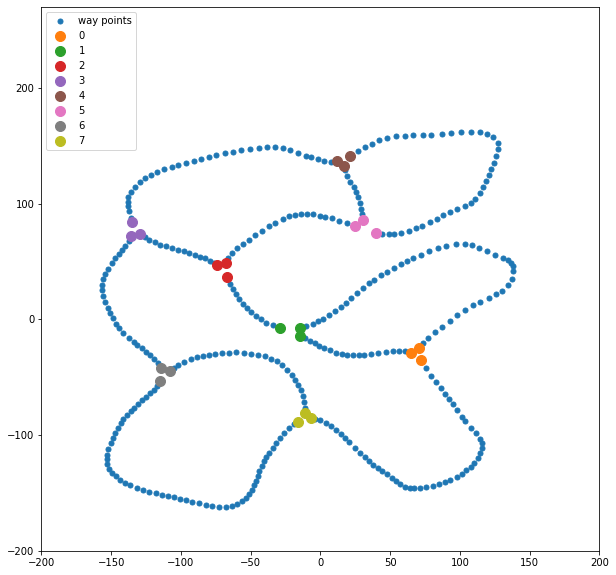

In [804]:
dictt = {
    'way points': [np.asarray(middle)[:, :2]/100, 5]
}
for i in set(inter_id):
    if i == -1:
        continue
    
    temp = []
    for j in range(len(middle)):
        if inter_id[j] == i:
            temp.append(middle[j])
    dictt[str(i)] = [np.asarray(temp)[:, :2]/100, 10]

am = Animator(lims=(-200, 200))
am.plot_points(dictt)
am.update()

In [805]:
with open(offroad_name+".csv",'w', newline='') as f:
    wr = csv.writer(f)
    wr.writerow([
        "middle.x", "middle.y", "middle.z",
        "side1.x", "side1.y", "side1.z",
        "side2.x", "side2.y", "side2.z",
        "group_id",
        "inter_id"
    ])
    for i in range(len(middle)):
        data = middle[i] + side1[i] + side2[i] + [group_id[i]] + [inter_id[i]]
        wr.writerow(data)